In [1]:
# making a classifer that achieves an accuracy of 97% on the MNIST dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# load the MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist['data'], mnist['target']
print(X.shape, y.shape)





(70000, 784) (70000,)


In [3]:
from sklearn.metrics import accuracy_score
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



C:\Users\Gaming Store\AppData\Local\Temp\ipykernel_8740\1458858196.py:1: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


(784,)


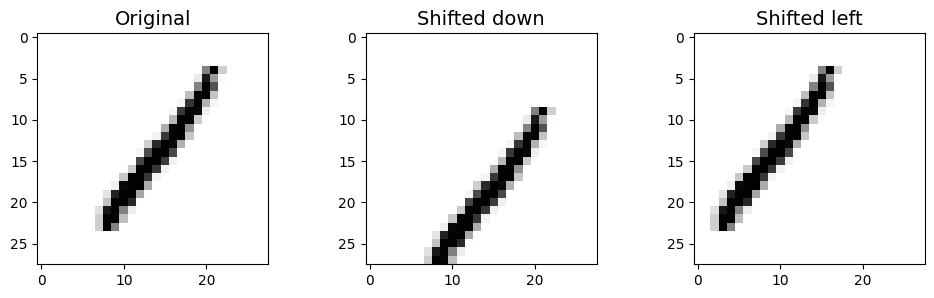

In [4]:
from scipy.ndimage.interpolation import shift
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])


image = X_train.iloc[1000,:]
print(image.shape)
image = image.to_numpy()
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [6]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]
print(X_train_augmented.__class__)
x_train_aug=[]
y_train_aug=[]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train.values, y_train):

        x_train_aug.append(shift_image(image, dx, dy))
        y_train_aug.append(label)


print(len(x_train_aug), len(y_train_aug))



<class 'list'>
224000 224000


In [16]:
print(X_train.shape, y_train.shape)
test = np.array(X_train)
print(test.shape)
print(test)

(56000, 784) (56000,)
(56000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
X_train_augmented = np.array(x_train_aug)
y_train_augmented = np.array(y_train_aug)
x_train_aug = np.array(x_train_aug)
y_train_aug = np.array(y_train_aug)


x_train_aug_final = np.concatenate((X_train, x_train_aug), axis=0)
y_train_aug_final = np.concatenate((y_train, y_train_aug), axis=0)

print(x_train_aug_final.shape, y_train_aug_final.shape)

(280000, 784) (280000,)


In [18]:
shuffle_idx = np.random.permutation(len(x_train_aug_final))
x_train_aug_final = x_train_aug_final[shuffle_idx]
y_train_aug_final = y_train_aug_final[shuffle_idx]



In [19]:
from sklearn.model_selection import GridSearchCV
# finding the best parameter and training the model
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=   9.2s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=   9.2s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=   9.1s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=   9.5s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=   9.7s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=   9.5s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=   8.5s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.973 total time=   8.4s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=   8.3s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=   8.9s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.967 total time=  11.7s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

In [ ]:
# training the KNN classifier after finding the best parameters 
knn_clf.fit(x_train_aug_final, y_train_aug_final)

In [ ]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)